In [12]:
import tensorflow as tf

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Display the shapes of the loaded data
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [13]:
print(f"Minimum pixel value in x_train: {x_train.min()}")
print(f"Maximum pixel value in x_train: {x_train.max()}")

Minimum pixel value in x_train: 0
Maximum pixel value in x_train: 255


In [14]:
x_train_flat = x_train.reshape(x_train.shape[0], -1).astype('float32')
x_test_flat = x_test.reshape(x_test.shape[0], -1).astype('float32')

print(f"x_train_flat shape: {x_train_flat.shape}")
print(f"x_train_flat dtype: {x_train_flat.dtype}")
print(f"x_test_flat shape: {x_test_flat.shape}")
print(f"x_test_flat dtype: {x_test_flat.dtype}")

x_train_flat shape: (60000, 784)
x_train_flat dtype: float32
x_test_flat shape: (10000, 784)
x_test_flat dtype: float32


In [19]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()

gnb_model.fit(x_train_flat, y_train)

print("Gaussian Naive Bayes model trained successfully.")

Gaussian Naive Bayes model trained successfully.


In [16]:
gnb_theta = gnb_model.theta_
gnb_var = gnb_model.var_

print(f"Shape of theta_ (means per class and feature): {gnb_theta.shape}")
print(f"Shape of var_ (variances per class and feature): {gnb_var.shape}")

Shape of theta_ (means per class and feature): (10, 784)
Shape of var_ (variances per class and feature): (10, 784)


In [17]:
import numpy as np
import matplotlib.pyplot as plt

def generate_digit_image(digit_class, model_theta, model_var):
    """Generates a new image for a given digit class by sampling from learned Gaussian distributions."""
    if not (0 <= digit_class <= 9):
        raise ValueError("Digit class must be between 0 and 9.")


    class_mean = model_theta[digit_class]
    class_variance = model_var[digit_class]

    generated_flat_image = np.random.normal(loc=class_mean, scale=np.sqrt(class_variance))


    generated_flat_image = np.clip(generated_flat_image, 0, 255).astype(np.uint8)


    generated_image = generated_flat_image.reshape(28, 28)
    return generated_image


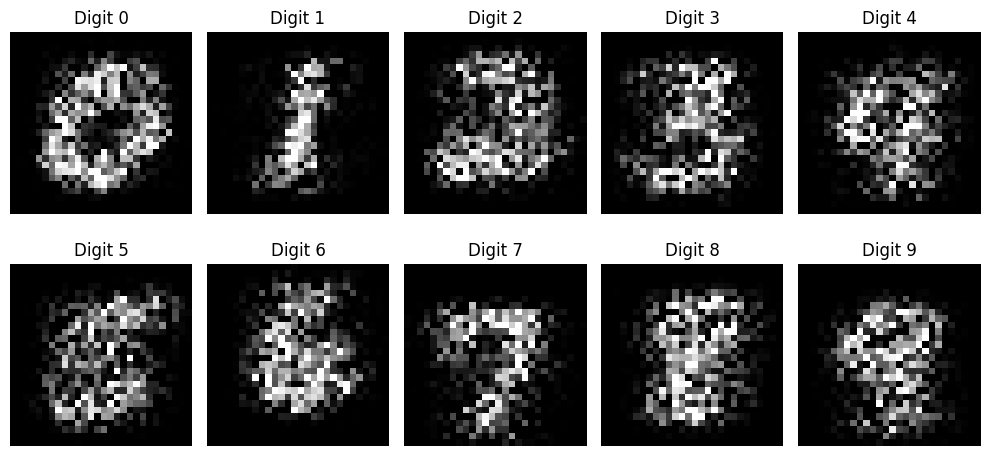

In [18]:
plt.figure(figsize=(10, 5))
for i in range(10):
    generated_img_i = generate_digit_image(i, gnb_theta, gnb_var)
    plt.subplot(2, 5, i + 1) # 2 rows, 5 columns
    plt.imshow(generated_img_i, cmap='gray')
    plt.title(f'Digit {i}')
    plt.axis('off')
plt.tight_layout()
plt.show()